# Project 3: Robo Cup - Correlated-Q Edition

----  



## Resources

The concepts explored in this project are covered by:
- Lectures
    - Game Theory (all of them)
- Readings
    - Greenwald-Hall (2003)

## Background

TODO

## Problem

For this project, you will be reading “Correlated Q-Learning” by Amy Greenwald and Keith Hall.
You are then asked to replicate the results found in Figure 3(parts a-d). You can use any
programming language and libraries you choose.

## Instructions

### Procedure
1. Read the paper.
2. Develop a system to replicate the experiment found in section "5. Soccer Game"
    - This will include the soccer game environment
    - This will include agents capable of Correlated-Q, Foe-Q, Friend-Q and Q-learning
3. Run the experiment found in section "5. Soccer Game"
    - Collect data necessary to reproduce all the graphs in Figure 3
4. Create graphs demonstrating
    - The Q-value difference for all agents
    - Anything else you may think appropriate
    
### Tips
1. Explain algorithms including Problem Formulation (in words or standard form is okay)
2. Environment Set up - Including rules of the game and assumptions made. 
3. Creating the agent - agent behavior under each algorithm.
4. Compare and explain differences with the plots.
5. Mention pitfalls - may include pitfalls while creating the agents and/or the environment.
6. Once again may be helpful to identify effects on hyperparameters for each algorithm. 


#### 0. Imports

In [2]:
#1. Install OpenAI Gym + Setup Env
import numpy as np
import math
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

## Step 0: Soccer Env Setup

In [3]:
import sys
sys.path.insert(0, '/Users/cesleemontgomery/masters/cs7642/projects/7642Fall2019cmontgomery38/project3')
from soccer import SoccerEnv

In [4]:
env = SoccerEnv()

In [4]:
# env.render()
# action = env.encode_action(SoccerEnv.Action.Stick, SoccerEnv.Action.Stick)
# env.step(action)
# env.render()

## Step 1: Agent Implementation
----


## Agent 1: Q learning 

### Step 1: Set Hyperparameters

In [8]:
n_episodes_MAX = 10*10**5
steps_MAX = 100
verbose = False
alpha_decay = .9999985

### Step 2: Instantiate Q-Learning Agent

The Q-Learner sees all states, but only makes optimal decisions over own actions so we pass it:

`num_states = env.observation_space.n`   
`num_actions = int(math.sqrt(env.action_space.n))`  #personal actions

In [9]:
num_states = env.observation_space.n
num_actions = int(math.sqrt(env.action_space.n)) #individual player action space is 5, joint action space is 25

#Instantiate Q-Learner
from QLearner import QLearningAgent
Q_agent = QLearningAgent(state_size=num_states, 
                       action_size=num_actions,
                      learning_rate_decay=alpha_decay)

# Ref state s, action 'S'
ref_state = SoccerEnv.encode_state(0, 2, 0, 1, 0)
ref_P1_action = int(SoccerEnv.Action.S)

# Q errors for plotting
Q_Learner_P1_Q_errors = []

for i_episode in range(n_episodes_MAX):
    state = env.reset()

    P1_Q_ref = Q_agent.Q[ref_state, ref_P1_action]

    for t in range(steps_MAX):
        P1_action = Q_agent.sample_policy(state)
        P2_action = np.random.randint(num_actions)

        joint_action = env.encode_action(P1_action, P2_action)

        # Take action A, observe R, S'
        state_new, reward, done, info = env.step(joint_action)

        Q_agent.learn(reward, state, state_new, P1_action)

        state = state_new

        if done:
            if verbose:
                print("Episode finished after {} timesteps".format(t + 1))
            break

    # calc error at end of episode update
    Q_Learner_P1_Q_errors.append(np.abs(Q_agent.Q[ref_state, ref_P1_action] - P1_Q_ref))

    np.save('./models/Q_Learner', Q_agent.Q)
    env.close()

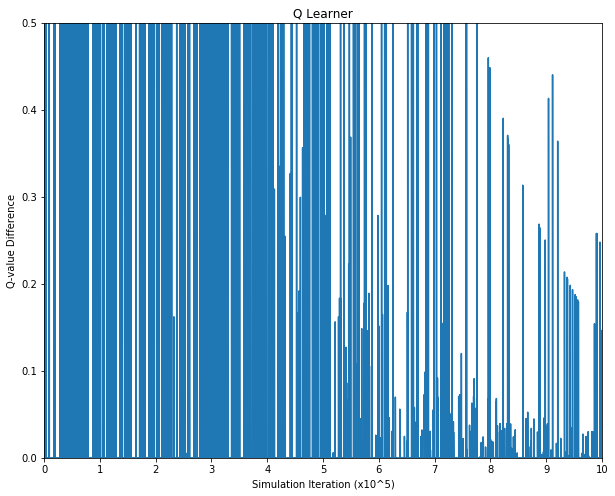

In [10]:
# import matplotlib.ticker as ticker

# # plot the scores
# fig, ax = plt.subplots(1, 1, figsize=(10, 8))
# plt.title('Q Learner')

# plt.plot(np.arange(len(Q_Learner_P1_Q_errors)), Q_Learner_P1_Q_errors);
# ax.xaxis.set_major_locator(ticker.LinearLocator(11))

# labels = range(0, int(n_episodes_MAX / 10**5)+1)
# ax.set_xticklabels(labels)

# plt.xlim( (0, n_episodes_MAX) )
# plt.ylim( (0, 0.5) )
# plt.ylabel('Q-value Difference')
# plt.xlabel('Simulation Iteration (x10^5)')
# fig.savefig('./figures/Q_Learner.png', dpi=fig.dpi)

## Agent 2: Friend-Q

### Step 1: Set Hyperparameters

In [9]:
n_episodes_MAX = 10*10**5
steps_MAX = 100
verbose = False
alpha = 0.05

### Step 2: Instantiate Friend-Q Agent

Friend Q is overly optimistic as it assumes a win for either player is a win for itself, so we pass it:

`num_states = env.observation_space.n`   
`num_actions = env.action_space.n`  #both players actions

In [10]:
num_states = env.observation_space.n
num_actions = env.action_space.n

#Instantiate Q-Learner
from QLearner import QLearningAgent
Friend_Q_agent = QLearningAgent(state_size=num_states, 
                                action_size=num_actions,
                               learning_rate=alpha)

# Ref state s, action 'S'
ref_state = SoccerEnv.encode_state(0, 2, 0, 1, 0)
ref_P1_action = int(SoccerEnv.Action.S)
ref_P2_action = int(SoccerEnv.Action.Stick)
ref_action_joint = env.encode_action(ref_P1_action, ref_P2_action)

# Q errors for plotting
Friend_Q_P1_Q_errors = []

for i_episode in range(n_episodes_MAX):
    state = env.reset()

    P1_Q_ref = Friend_Q_agent.Q[ref_state, ref_action_joint]

    for t in range(steps_MAX):
#         P1_action = Friend_Q_agent.sample_policy(state)
        joint_action = np.random.randint(num_actions)

        # Take action A, observe R, S'
        state_new, reward, done, info = env.step(joint_action)
        
        
        reward_P1 = reward if X else: -reward

        Friend_Q_agent.learn(reward, state, state_new, joint_action)

        state = state_new

        if done:
            if verbose:
                print("Episode finished after {} timesteps".format(t + 1))
            break

    # calc error at end of episode update
    Friend_Q_P1_Q_errors.append(np.abs(Friend_Q_agent.Q[ref_state, ref_action_joint] - P1_Q_ref))

    np.save('./models/Friend_Q', Friend_Q_agent.Q)
    env.close()

#### 1. Run the experiment

1. Collect data necessary to reproduce all the graphs in Figure 3
Reproduce graphs.

2. Instantiate Environment and Agent


Text(0.5, 0, 'Simulation Iteration (x10^5)')

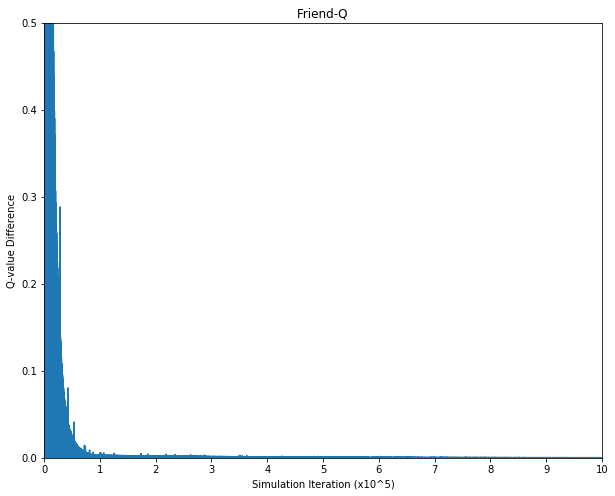

In [13]:
import matplotlib.ticker as ticker

# plot the scores
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plt.title('Friend-Q')

plt.plot(np.arange(len(Friend_Q_P1_Q_errors)), Friend_Q_P1_Q_errors);
ax.xaxis.set_major_locator(ticker.LinearLocator(11))

labels = range(0, int(n_episodes_MAX / 10**5)+1)
ax.set_xticklabels(labels)

plt.xlim( (0, n_episodes_MAX) )
plt.ylim( (0, 0.5) )
plt.ylabel('Q-value Difference')
plt.xlabel('Simulation Iteration (x10^5)')
# fig.savefig('./figures/Friend_Q.png', dpi=fig.dpi)

### Agent: Foe-Q

### Step 1: Set Hyperparameters

In [10]:
n_episodes_MAX = 2*10**5 #10*10**5
steps_MAX = 100
verbose = False
alpha = 0.1

### Step 2: Instantiate Foe-Q Agent

Foe Q is focused on performing as well as possible, while making sure you perform as poorly as possible (known as Minimax-Q), so we pass it:

`num_states = env.observation_space.n`   
`num_actions = int(math.sqrt(env.action_space.n))`  #personal 

and...

use Minimax-Q LP solver.

In [11]:
num_states = env.observation_space.n
num_actions = env.action_space.n
num_individual_actions = int(math.sqrt(env.action_space.n)) #individual player action space is 5, joint action space is 25

#Instantiate Q-Learner
from QLearner import QLearningAgent
Foe_Q_agent = QLearningAgent(state_size=num_states, 
                                action_size=num_individual_actions,
                             value_state_function_learner='minimax-q',
                               learning_rate=alpha)

# Ref state s, action 'S'
ref_state = SoccerEnv.encode_state(0, 2, 0, 1, 0)
ref_P1_action = int(SoccerEnv.Action.S)
ref_P2_action = int(SoccerEnv.Action.Stick)

# Q errors for plotting
Foe_Q_P1_Q_errors = []

for i_episode in range(n_episodes_MAX):
    state = env.reset()

    P1_Q_ref = Foe_Q_agent.Q[ref_state, ref_P1_action, ref_P2_action]

    for t in range(steps_MAX):
        joint_action = np.random.randint(num_actions)

        # Take action A, observe R, S'
        state_new, reward, done, info = env.step(joint_action)

        # Update Q
        P1_action, P2_action = env.decode_action(joint_action)
        P1_reward, P2_reward = env.decode_reward(state, reward)
        Foe_Q_agent.learn(P1_reward, state, state_new, P1_action, P2_action)

        state = state_new

        if done:
            # if verbose:
            #     print("Episode finished after {} timesteps".format(t + 1))
            break

    # calc error at end of episode update
    Foe_Q_P1_Q_errors.append(np.abs(Foe_Q_agent.Q[ref_state, ref_P1_action, ref_P2_action] - P1_Q_ref))

    # np.save('./models/Foe_Q', Foe_Q_agent.Q)
    # env.close()

#### 1. Run the experiment

1. Collect data necessary to reproduce all the graphs in Figure 3
Reproduce graphs.

2. Instantiate Environment and Agent


TypeError: required field "lineno" missing from expr

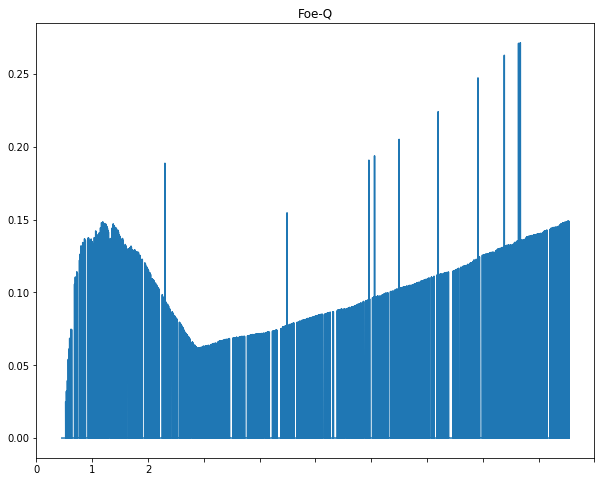

In [12]:
import matplotlib.ticker as ticker

# plot the scores
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plt.title('Foe-Q')

plt.plot(np.arange(len(Foe_Q_P1_Q_errors)), Foe_Q_P1_Q_errors);
ax.xaxis.set_major_locator(ticker.LinearLocator(11))

labels = range(0, int(n_episodes_MAX / 10**5)+1)
ax.set_xticklabels(labels)

plt.xlim( (0, n_episodes_MAX) )
plt.ylim( (0, 0.5) )
plt.ylabel('Q-value Difference')
plt.xlabel('Simulation Iteration (x10^5)')
# fig.savefig('./figures/Foe_Q.png', dpi=fig.dpi)

### Agent: Correlated-Q

### Step 1: Set Hyperparameters

In [17]:
n_episodes_MAX = 1*10**5
steps_MAX = 100
verbose = False
alpha = 0.9

### Step 2: Instantiate Correlated-Q Agent

`num_states = env.observation_space.n`   
`num_actions = env.action_space.n`  #both players actions

and...

constraints
1. Probability Constraints = Sum of Probs = 1 AND Probs >=0
2. Rationality Constraints = N*(N-1) Constraints of expected reward

In [ ]:
num_states = env.observation_space.n
num_actions = env.action_space.n
num_individual_actions = int(math.sqrt(env.action_space.n)) #individual player action space is 5, joint action space is 25

#Instantiate Q-Learner
from QLearner import solve_corr_Q
from QLearner import QLearningAgent
CorrQ_agent_P1 = QLearningAgent(state_size=num_states, 
                                action_size=num_individual_actions,
                             value_state_function_learner='max-sum-q',
                               learning_rate=alpha)

CorrQ_agent_P2 = QLearningAgent(state_size=num_states, 
                                action_size=num_individual_actions,
                             value_state_function_learner='max-sum-q',
                               learning_rate=alpha)

# Ref state s, action 'S'
ref_state = SoccerEnv.encode_state(0, 2, 0, 1, 0)
ref_P1_action = int(SoccerEnv.Action.S)
ref_P2_action = int(SoccerEnv.Action.Stick)

# Q errors for plotting
# CorrQ_P1_Q_errors = []

for i_episode in range(n_episodes_MAX):
    state = env.reset()

    P1_Q_ref = CorrQ_agent_P1.Q[ref_state, ref_P1_action, ref_P2_action]

    for t in range(steps_MAX):
        joint_action = np.random.randint(num_actions)

        # Take action A, observe R, S'
        state_new, reward, done, info = env.step(joint_action)
        
        #Update Q
        P1_action, P2_action = env.decode_action(joint_action)
#         P1_reward, P2_reward = env.decode_reward(state, reward)
        
        ceq_V_P1, ceq_V_P2 = solve_corr_Q(CorrQ_agent_P1.Q, CorrQ_agent_P2.Q, state)
        
#         CorrQ_agent_P1.learn(P1_reward, state, state_new, P1_action, P2_action, ceq_V_P1)
#         CorrQ_agent_P2.learn(P2_reward, state, state_new, P1_action, P2_action, ceq_V_P2)
        CorrQ_agent_P1.learn(reward, state, state_new, P1_action, P2_action, ceq_V_P1)
        CorrQ_agent_P2.learn(reward, state, state_new, P1_action, P2_action, ceq_V_P2)

        state = state_new

        if done:
            if verbose:
                print("Episode finished after {} timesteps".format(t + 1))
            break
    
    Q_error = np.abs(CorrQ_agent_P1.Q[ref_state, ref_P1_action, ref_P2_action] - P1_Q_ref)
    
    if i_episode % 50000 == 0:
        print('Q_ERR[@iter={}]\t={}'.format(i_episode, Q_error))
    
    # calc error at end of episode update
    CorrQ_P1_Q_errors.append(Q_error)

#     np.save('./models/Corr_Q', CorrQ_agent_P1.Q)
#     env.close()

Q_ERR[@iter=0]	=0.0


In [ ]:
# num_states = env.observation_space.n
# num_actions = env.action_space.n
# num_individual_actions = int(math.sqrt(env.action_space.n)) #individual player action space is 5, joint action space is 25

# #Instantiate Q-Learner
# from QLearner import solve_corr_Q
# from QLearner import QLearningAgent
# CorrQ_agent_P1 = QLearningAgent(state_size=num_states, 
#                                 action_size=num_individual_actions,
#                              value_state_function_learner='max-sum-q',
#                                learning_rate=alpha)

# CorrQ_agent_P2 = QLearningAgent(state_size=num_states, 
#                                 action_size=num_individual_actions,
#                              value_state_function_learner='max-sum-q',
#                                learning_rate=alpha)

# # Ref state s, action 'S'
# ref_state = SoccerEnv.encode_state(0, 2, 0, 1, 0)
# ref_P1_action = int(SoccerEnv.Action.S)
# ref_P2_action = int(SoccerEnv.Action.Stick)

# # Q errors for plotting
# CorrQ_P1_Q_errors = []

# for i_episode in range(n_episodes_MAX):
#     state = env.reset()

#     P1_Q_ref = CorrQ_agent_P1.Q[ref_state, ref_P1_action, ref_P2_action]

#     for t in range(steps_MAX):
#         joint_action = np.random.randint(num_actions)

#         # Take action A, observe R, S'
#         state_new, reward, done, info = env.step(joint_action)
        
#         #Update Q
#         P1_action, P2_action = env.decode_action(joint_action)
#         P1_reward, P2_reward = env.decode_reward(state, reward)
        
#         ceq_V_P1, ceq_V_P2 = solve_corr_Q(CorrQ_agent_P1.Q, CorrQ_agent_P2.Q, state)
        
#         CorrQ_agent_P1.learn(P1_reward, state, state_new, P1_action, P2_action, ceq_V_P1)
#         CorrQ_agent_P2.learn(P2_reward, state, state_new, P1_action, P2_action, ceq_V_P2)
# #         CorrQ_agent_P1.learn(reward, state, state_new, P1_action, P2_action, ceq_V_P1)
# #         CorrQ_agent_P2.learn(reward, state, state_new, P1_action, P2_action, ceq_V_P2)

#         state = state_new

#         if done:
#             if verbose:
#                 print("Episode finished after {} timesteps".format(t + 1))
#             break
    
#     Q_error = np.abs(CorrQ_agent_P1.Q[ref_state, ref_P1_action, ref_P2_action] - P1_Q_ref)
    
#     if i_episode % 50000 == 0:
#         print('Q_ERR[@iter={}]\t={}'.format(i_episode, Q_error))
    
#     # calc error at end of episode update
#     CorrQ_P1_Q_errors.append(Q_error)

#     np.save('./models/Corr_Q', CorrQ_agent_P1.Q)
#     env.close()

#### 1. Run the experiment

1. Collect data necessary to reproduce all the graphs in Figure 3
Reproduce graphs.

2. Instantiate Environment and Agent


In [ ]:
import matplotlib.ticker as ticker

# plot the scores
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plt.title('Corr-Q')

plt.plot(np.arange(len(CorrQ_P1_Q_errors)), CorrQ_P1_Q_errors);
# ax.xaxis.set_major_locator(ticker.LinearLocator(11))

# labels = range(0, int(n_episodes_MAX / 10**5)+1)
# ax.set_xticklabels(labels)

# plt.xlim( (0, n_episodes_MAX) )
plt.ylim( (0, 0.5) )
plt.ylabel('Q-value Difference')
plt.xlabel('Simulation Iteration (x10^5)')
# fig.savefig('./figures/Corr_Q.png', dpi=fig.dpi)